## CODECLAUSE DATASCIENCE INTERNSHIP
## PIYASA BERA
## TASK - 1
## FAKE NEWS PREDICTION

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing the csv file

df = pd.read_csv('news.csv')

In [3]:
# First 5 row of dataset

df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# last 5 row of dataset

df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
# shape of the dataset

df.shape

(6335, 4)

In [6]:
# to check for duplicate values

df.duplicated().sum()

0

In [7]:
# Removing the duplicates

df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
# Is there any null values is the dataset

df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [10]:
# Removing the unnamed column

df=df.drop('Unnamed: 0',axis=1)

In [11]:
df.sample(10)

,title,text,label
182,Iran carries out new ballistic missile test,Iran successfully test-fired a medium-range ba...,REAL
810,Trump: I wouldn't accept Cruz's endorsement,"""If he gives it, I will not accept it,"" Trump ...",REAL
3868,Chris Christie fades into darkness,"On this day in 1973, J. Fred Buzhardt, a lawye...",REAL
609,"The Saber Rattling Between Saudis, Iran Just G...","JERUSALEM, Israel  An unknown group in Iran p...",REAL
816,Trump controlled by Mossad,"By wmw_admin on October 30, 2016 By Timothy Fi...",FAKE
5880,Yemen and YET another “False Flag” to Protect ...,Country: Saudi Arabia In Seth Ferris’ NEO arti...,FAKE
572,Doctor Finds New Life As A Clown More Fulfilli...,Tweet \nPediatrician Jim Smith is thrilled wit...,FAKE
6241,U.S. added 257K jobs in January; unemployment ...,The United States kept up its breakneck pace o...,REAL
271,The Fix Is In: NBC Affiliate Accidentally Post...,"NBC affiliate WRCB TV in Chattanooga, Tennesse...",FAKE
3713,"Obama endorses Clinton for president, on heels...",President Obama formally endorsed Hillary Clin...,REAL


In [12]:
# Checking how many outputes do we have

l = df.label;
l.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [13]:
# Statistical description

df.describe()

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [14]:
# Deleting the title column as we want to work on title column

df=df.drop('title',axis=1)

In [15]:
df.sample(10)

,text,label
6052,"140230 Views November 12, 2016 BROADCAST King ...",FAKE
1586,Top Clinton Ally Caught Accepting $20k Foreign...,FAKE
3627,A woman who got fired after two days of workin...,REAL
3030,A Twitter page known as Black Women for Trump ...,FAKE
4680,posted by Eddie A list of secret Apple iPhone ...,FAKE
5373,18 Shares\n17 0 0 1\nMohsen Abdelmoumen : Don'...,FAKE
1265,Syrian President Bashar al-Assad ventured outs...,REAL
2546,"Responding to rising threats across Europe, Fr...",REAL
237,Hillary Clinton has earned enough delegates to...,REAL
5542,US Drone Pilots May Be ‘Illegally’ Acquiring T...,FAKE


### DATA VISUALIZATION

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

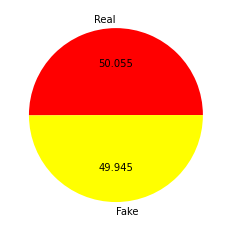

In [17]:
#pie chart

plt.pie(df['label'].value_counts(),labels=['Real','Fake'],colors=['red','yellow'],autopct='%0.3f')
plt.show()

#### Data is well distributed

In [18]:
# function to change the texts (title,text) machine understandable

import re

def convert(text):
    text = text.lower()
    text = re.sub(r'https?://S+|www\.\S+' , '' , text)
    text = re.sub('\n' , '' , text)
    text = re.sub('\[.*?\]', '', text)
    words = []
    for i in text:
        if i not in string.punctuation:
            words.append(i)
    return ''.join(words)

In [19]:
import string

df["text"] = df["text"].apply(convert)

In [20]:
df

,text,label
0,daniel greenfield a shillman journalism fellow...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,us secretary of state john f kerry said monday...,REAL
3,— kaydee king kaydeeking november 9 2016 the l...,FAKE
4,its primary day in new york and frontrunners h...,REAL
...,...,...
6330,the state department told the republican natio...,REAL
6331,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE
6332,antitrump protesters are tools of the oligarc...,FAKE
6333,addis ababa ethiopia —president obama convened...,REAL


### Making Data Ready for Model fitting

In [21]:
#to make the label neumerical from categorical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.sample(10)

,text,label
2450,breaking fbi gets search warrant for state dep...,0
5073,lawmakers may have let president barack obamas...,1
5398,argentine president mauricio macris office reb...,1
555,democrats loyal to vice president biden have a...,1
3111,heres something interesting from the unz revie...,0
932,new jersey gov chris christie is refusing to h...,1
3670,so far none of the presidential debates — demo...,1
145,are the wheels coming off the iran deal less t...,1
414,email isis has declared war on palestine threa...,0
1528,pope francis in the firstever papal address to...,1


#### 1 means fake and 0 means real

In [22]:
x=df['text']
y=df['label']

In [23]:
# Splitting into training and testing dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],df['label'], test_size=0.2, random_state=7)

In [24]:
x_train

6237    the head of a leading survivalist group has ma...
3722    ‹ › arnaldo rodgers is a trained and educated ...
5774    patty sanchez 51 used to eat 13000 calories a ...
336     but benjamin netanyahu’s reelection was regard...
3622    john kasich was killing it with these iowa vot...
                              ...                        
5699                                                     
2550    it’s not that americans won’t elect wealthy pr...
537     anyone writing sentences like ‘nevertheless fu...
1220    more catholics are in congress than ever befor...
4271    it was hosted by cnn and the presentation was ...
Name: text, Length: 5068, dtype: object

In [25]:
# To convert Text Data to vectors

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train= vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [26]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
LogisticRegression()
pred_lr=LR.predict(x_test)
LR.score(x_test, y_test)

0.9187056037884768

### TESTING

In [27]:
def answer(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def test(n):
    test_n = {"text":[n]}
    new_def_test = pd.DataFrame(test_n)
    new_def_test["text"] = new_def_test["text"].apply(convert) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("Prediction: {} ".format(answer(pred_LR[0])))

In [28]:
n="october    at   am  pretty factual except for women in the selective service  american military is still voluntary only and hasn t been a draft since vietnam war  the comment was made by a  star general of the army about drafting women and he said it to shut up liberal yahoos"
test(n) # original fake news


Prediction: Fake News 


In [29]:
n='shocking  michele obama   hillary caught glamorizing date rape promoters first lady claims moral high ground while befriending rape glorifying rappers infowars com   october    comments  alex jones breaks down the complete hypocrisy of michele obama and hillary clinton attacking trump for comments he made over a decade ago while the white house is hosting and promoting rappers who boast about date raping women and selling drugs in their music   rappers who have been welcomed to the white house by the obama s include  rick ross   who promotes drugging and raping woman in his song  u o n e o    while attacking trump as a sexual predator  michelle and hillary have further mainstreamed the degradation of women through their support of so called musicians who attempt to normalize rape  newsletter sign up get the latest breaking news   specials from alex jones and the infowars crew  related articles'
test(n) # original answer fake news

Prediction: Fake News 


### SAVING THE MODEL

In [30]:
import pickle

In [31]:
pickle.dump(LR,open('fake_news_detector.pkl','wb'))